# Introduction:

Cell tower points are very important to neighborhoods because you are going to want hte stronged possible connection to the internet that you can get. Greenways are vital to neighborhoods and cities because they reduce air and water pollution. Furthermore, the fire incidents in neighborhoods are huge in determining whether a neighborhood is good or not, since you won’t want to movie into a flammable neighborhood. This is a good metric for measuring how safe a community is. 



## Our Metrics
Number of greenways per neighborhood, number of fire incidents per neighborhood, and number of cell tower locations per neighborhood

## Our Datasets

Neighborhood Boundaries in Pittsburgh: https://data.wprdc.org/dataset/neighborhoods2
This dataset shows the boundaries of Pittsburgh neighborhoods.

Cell tower points: https://data.wprdc.org/dataset/allegheny-county-cell-tower-points

This dataset portrays cell tower points in Allegheny county.

Greenways: https://data.wprdc.org/dataset/allegheny-county-greenways

This dataset shows the number of greenways in Allegheny county


Fire incidents: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

This dataset portrays where recent fire incidents occured in Allegheny county.

## Metric #1: Cell Tower Locations in Allegheny County

Starting off by reading the data from Pittsburgh neighborhoods.

In [1]:
import geopandas as gpd
import pandas as pd

neighborhood_boundaries = gpd.read_file('./Neighborhoods_.shp')

neighborhood_boundaries.head(4)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."


Here is the data for Pittsburgh neighborhoods, with each neighborhood name being found under the "hood" column and their borders under the "geometry" column.

Now we have to load in the data for the cell tower points.

In [11]:
towers = gpd.read_file('./CellTowerPoints.shp') 

#Renaming columns to "longitude" and "latitude"
towers = towers.rename(columns={"Longitude_X": "Longitude", "Latitude_Y": "Latitude"})

towers.head(4)

,FID,PIN,MAPBLOCKLO,MUNICODE,TAXYR,NAME,CARD,LLINE,CODE,DESCRIB,...,YRBLT,EFFYR,ADJRCNLD,ORIG_FID,OWNER_NAME,CreationDa,Creator,EditDate,Editor,geometry
0,1,0152A00174000000,152-A-174,939,2016.0,Robinson,1.0,2.0,M20,CELL - MONOPOLE 100-149 - AVG,...,1990.0,None,68200.0,1,CROWN ATLANTIC COMPANY LLC,2015-11-24,GISHelp,2015-11-24,GISHelp,POINT (-80.11293 40.45285)
1,3,0379M00020000000,379-M-20,408,2016.0,8th Ward - McKEESPORT,1.0,3.0,M21,CELL - MONOPOLE 100-149 - GOOD,...,2000.0,None,99000.0,3,GLOBAL SIGNAL ACQUISITIONS IV LLC,2015-11-24,GISHelp,2015-11-24,GISHelp,POINT (-79.83347 40.35873)
2,5,1063B00145000100,1063-B-145-1,883,2016.0,Bell Acres,1.0,6.0,M26,CELL - MONOPOLE 150-199 - GOOD,...,1997.0,None,146900.0,5,CROWN ATLANTIC COMPANY LLC,2015-11-24,GISHelp,2015-11-24,GISHelp,POINT (-80.17625 40.59666)
3,6,0228E00168000000,228-E-168,931,2016.0,O''Hara,1.0,7.0,S21,CELL - SELF SPRT 100-149 - GD,...,2005.0,None,94600.0,6,LASER WASH GROUP LLC,2015-11-24,GISHelp,2015-11-24,GISHelp,POINT (-79.87992 40.48774)


Here is our the cell tower data, with the points under the "geometry" column using latitude and longitude

Cleaning up the data, so we only see the neighborhood, its coordinates, and its number of cell towers.

In [5]:
import geopandas as gpd
import pandas as pd


# Create a new DataFrame for neighborhoods
neighborhoods = pd.DataFrame(columns=["Neighborhood", "Geometry", "Towers"])
neighborhoods["Neighborhood"] = neighborhood_boundaries["hood"]
neighborhoods["Geometry"] = neighborhood_boundaries["geometry"]
neighborhoods["Towers"] = 0

neighborhoods.head(3)

,Neighborhood,Geometry,Towers
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0


We are now going to iterate through the cell towers in order to find out which neighborhoods have the most cell towers.

In [10]:
from shapely.geometry import Point

for i, tower in towers.iterrows():
    # Create a Point geometry for the tower
    tower_pt = tower["geometry"]
    # Iterate through each neighborhood boundary
    for j, neighborhood in neighborhoods.iterrows():
        # Check if the neighborhood contains the tower
        if neighborhood["Geometry"].contains(tower_pt):
            neighborhoods.at[j, 'Towers'] = neighborhood["Towers"] + 1
            # Break to save computation time
            break

neighborhoods.head(3)




,Neighborhood,Geometry,Towers
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0


Now, we are able to sort the data. 

In [16]:
neighborhoods_sorted = neighborhoods.sort_values("Towers", ascending=False)

neighborhoods_sorted.head()

,Neighborhood,Geometry,Towers
60,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",4
76,Summer Hill,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",3
25,Hays,"POLYGON ((-79.95606 40.40916, -79.95625 40.408...",2
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",2
37,New Homestead,"POLYGON ((-79.91621 40.39849, -79.91621 40.398...",2


So, as we can see, Hazelwood has the most cell towers, with a huge number of 4.

Now, we are going to plot the top 20 neighborhoods. There probably won't be much variety in this plot, though, so we are only plotting 20.

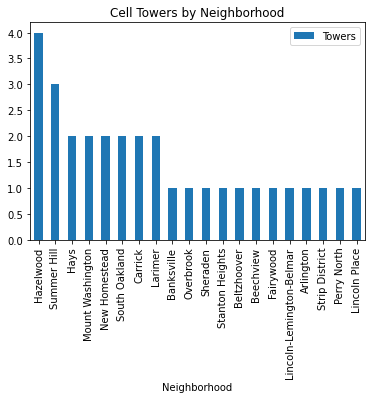

In [22]:
plt = neighborhoods_sorted.iloc[:20].plot(kind='bar', x="Neighborhood", y="Towers", title="Cell Towers by Neighborhood")




Now we can plot the bottom 20. We had to use boolean indexing to exclude neighborhoods with 0 towers, since none existed in Allegheny County.

[]

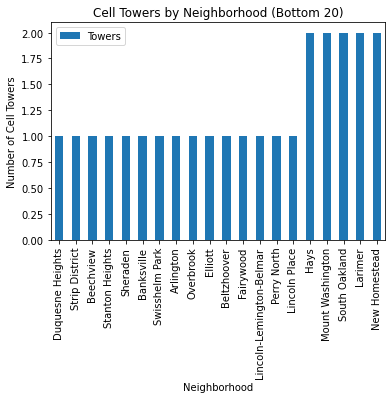

In [25]:
# Create a new DataFrame with neighborhoods that have at least 1 tower
neighborhoods_nonzero = neighborhoods[neighborhoods["Towers"] > 0]

# Sort neighborhoods by the number of towers in ascending order
neighborhoods_asc = neighborhoods_nonzero.sort_values("Towers")

# Plot the bottom 20 neighborhoods by number of towers
plt2 = neighborhoods_asc.iloc[:20].plot(kind='bar', x="Neighborhood", y="Towers", title="Cell Towers by Neighborhood (Bottom 20)")
plt2.set_xlabel("Neighborhood")
plt2.set_ylabel("Number of Cell Towers")
plt2.tick_params(axis='x', labelrotation=90)

plt2.plot()


In [ ]:
Now, we are going to add the cell tower data to the "neighborhood_boundaries" GeoDataFrame

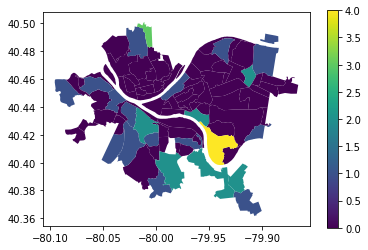

In [29]:
neighborhood_boundaries["Towers"] = neighborhoods["Towers"]

plt3 = neighborhood_boundaries.plot(column="Towers", legend=True)   

Finally, we can make a final ranking through the creation of a new dataframe.

In [30]:
# Create a new dataframe to store the final ranks
neighborhoods_ranked = pd.DataFrame()

# Add the neighborhood names to the new dataframe
neighborhoods_ranked["Neighborhood"] = neighborhoods["Neighborhood"]

# Create ranks for each of the metrics
neighborhoods_ranked["Towers_Rank"] = 0

# Sort neighborhoods by number of cell towers and assign ranks
neighborhoods_sorted = neighborhoods.sort_values("Towers", ascending=False)
rank = 1
for index, neighborhood in neighborhoods_sorted.iterrows():
    neighborhoods_ranked.loc[neighborhoods_ranked["Neighborhood"] == neighborhood["Neighborhood"], "Towers_Rank"] = rank
    rank += 1

# Display the top 10 neighborhoods by cell tower count with their corresponding ranks
neighborhoods_ranked.sort_values("Towers_Rank").head(10)


,Neighborhood,Towers_Rank
60,Hazelwood,1
76,Summer Hill,2
25,Hays,3
54,Mount Washington,4
37,New Homestead,5
62,South Oakland,6
51,Carrick,7
20,Larimer,8
53,Banksville,9
40,Overbrook,10


## Metric 2: